In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv("labeling_df.csv")

In [3]:
df.head()

,year,month,day,user_name,favorite_count,retweet_count,text,user_location_ab,word_count,char_count,average_word_len,polarity
0,2017,3,11,ADub,0,16427,RT @GeorgeTakei: The GOP wants to ensure the m...,SK,25,139,4.600000,-0.150
1,2017,6,12,Annapolis NDP,1,0,Urgent-health care planning must be based on a...,NS,16,115,6.250000,0.000
2,2017,6,21,Lethbridge living,1,0,This research project is focused on making pri...,AB,13,107,7.307692,0.425
3,2017,6,14,THĒ RÅÏŃ MÅÑ ☔️,0,40988,RT @SenSanders: BREAKING: Senate Republicans j...,AB,19,140,6.421053,0.000
4,2017,6,8,Steven Holland,0,27,RT @AndreaHorwath: Simply appalling. We have t...,ON,27,148,4.518519,-0.350


In [4]:
df1 = df.drop(['year','month','day','user_name','favorite_count','retweet_count','user_location_ab','word_count','char_count','average_word_len'],axis=1)

In [5]:
df1.head()

,text,polarity
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150
1,Urgent-health care planning must be based on a...,0.000
2,This research project is focused on making pri...,0.425
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350


In [6]:
df1.isna().any()

text        False
polarity    False
dtype: bool

In [7]:
df1.head()

,text,polarity
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150
1,Urgent-health care planning must be based on a...,0.000
2,This research project is focused on making pri...,0.425
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350


In [8]:
df1['sentiment'] = pd.cut(df1.polarity,
                         bins=[-1.1,-0.5,-0.1,0.1,0.5,1],
                         labels=[0,1,2,3,4])

In [9]:
df1.head()

,text,polarity,sentiment
0,RT @GeorgeTakei: The GOP wants to ensure the m...,-0.150,1
1,Urgent-health care planning must be based on a...,0.000,2
2,This research project is focused on making pri...,0.425,3
3,RT @SenSanders: BREAKING: Senate Republicans j...,0.000,2
4,RT @AndreaHorwath: Simply appalling. We have t...,-0.350,1


In [10]:
df1.isnull().any()

text         False
polarity     False
sentiment    False
dtype: bool

In [11]:
df1.count()

text         294528
polarity     294528
sentiment    294528
dtype: int64

In [12]:
df2 = df1.drop_duplicates()

In [13]:
df2.count()
# Compared with df1, there have 128666 tweets are duplicated. 

text         165862
polarity     165862
sentiment    165862
dtype: int64

In [14]:
#I choosed the dupilicates removed dataset df2 to be continue.

In [15]:
neg_phrases = df2[df2.sentiment == 0]

In [16]:
neg_words = []
for t in neg_phrases.text:
    neg_words.append(t)
neg_words[:4]

['RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResistance #p2 https://t.co/8n6V9sXSXV',
 "I'm sorry if i did something wrong. https://t.co/OVDUfXe8xR",
 "RT @Tom_Parkin_: Too bad Trump didn't tell Justin to  increase healthcare, childcare or housing spending. https://t.co/2ifyfT9uPn",
 '@POTUS you are disgusting. Millions will be without healthcare and you gloat. 👎🏼']

In [17]:
neg_text = pd.Series(neg_words).str.cat(sep=" ")
neg_text[:100]

'RT @JewRicans: Republican #trumpcare healthcare plan is to #masa Make America Sick Again #TheResista'

In [18]:
for t in neg_phrases.text[:300]:
    if 'good' in t:
        print(t)

In [19]:
pos_phrases = df1[df1.sentiment == 4]
pos_words = []
for t in pos_phrases.text:
    pos_words.append(t)
pos_words[:4]

["RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's health care plan https://t.co/j7JE4N62ec",
 'RT @SchlegelVillage: Thrilled to welcome Dr. Bob Bell, Deputy Minister of Health &amp; Long-Term Care to the Innovation Summit. #SVInnovates @O…',
 "RT @funder: Karen Handel denies climate science—thinks being gay is wrong—Anti-women's rights—Supports Trumpcare—She's perfect for GOP Cong…",
 'RT @sahilkapur: "We know this is not the best way to do health care," says @LindseyGrahamSC. "But it\'s the way we\'re having to do it."']

In [20]:
pos_text = pd.Series(pos_words).str.cat(sep=" ")
pos_text[:100]

"RT @nowthisnews: This Democratic congressman had the perfect takedown of Paul Ryan and the GOP's hea"

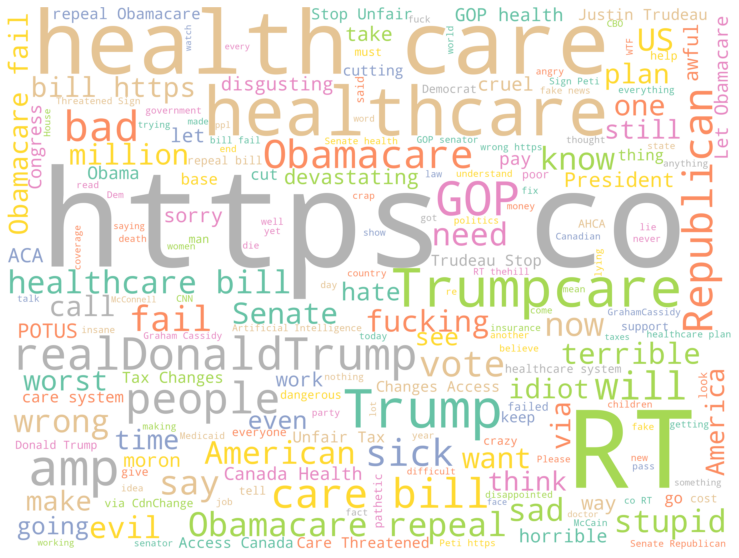

In [21]:
# 1.1 Word Cloud for negative health care tweets
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(neg_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

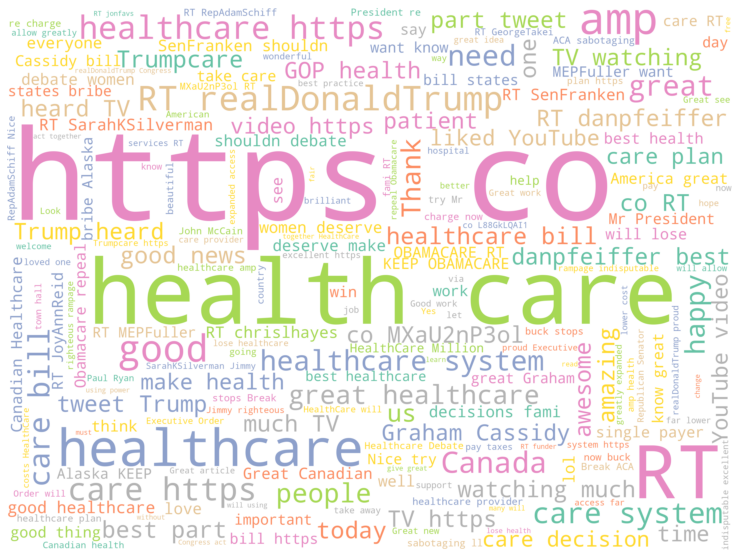

In [22]:
# 1.2 Word Cloud for positive health care tweets
wordcloud = WordCloud(background_color="white",width=3600, height=2700).generate(pos_text)
plt.figure(figsize=(16,10))
plt.imshow(wordcloud.recolor(colormap=plt.get_cmap('Set2')), interpolation='bilinear')
plt.axis("off")
plt.show()

In [23]:
#2. Term Frequancy (Unigram)

In [24]:
#2.1 Term Frequancy for negative sentiments

In [25]:
from sklearn.feature_extraction.text import CountVectorizer
cvector = CountVectorizer(min_df = 0.0, max_df = 1.0, ngram_range=(1,1))
cvector.fit(df1.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=0.0,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [26]:
len(cvector.get_feature_names())

209496

In [27]:
neg_matrix = cvector.transform(df1[df1.sentiment == 0].text)
sli_neg_matrix = cvector.transform(df1[df1.sentiment == 1].text)
neu_matrix = cvector.transform(df1[df1.sentiment == 2].text)
sli_pos_matrix = cvector.transform(df1[df1.sentiment == 3].text)
pos_matrix = cvector.transform(df1[df1.sentiment == 4].text)

In [28]:
neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

In [29]:
neg_tf.head(10)

,Terms,negative
0,rt,9097
1,the,7077
2,https,6975
3,to,6636
4,co,6283
5,is,4229
6,health,4027
7,care,3910
8,it,3136
9,of,2889


In [30]:
neg_tf_df = neg_tf.set_index('Terms')
neg_tf_df.head(10)

,negative
Terms,
rt,9097
the,7077
https,6975
to,6636
co,6283
is,4229
health,4027
care,3910
it,3136


In [31]:
#2.2 Term Frequancy for slight-negative sentiments

In [32]:
sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')
sli_neg_tf_df.head(10)

,slight-negative
Terms,
rt,27711
the,22069
https,18929
to,18528
co,16707
health,13530
is,13108
care,12793
of,10493


In [33]:
#2.3 Term Frequancy for neutral sentiments

In [34]:
neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')
neu_words_tf_df.head(10)

,neutral
Terms,
rt,109676
https,98760
co,88172
the,79566
to,69501
health,56742
care,54555
of,40240
healthcare,39142


In [35]:
#2.4 Term Frequancy for slight-positive sentiments

In [36]:
sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')
sli_pos_words_tf_df.head(10)

,slight-positive
Terms,
rt,53904
https,43220
to,40617
the,39585
co,38532
health,30064
care,29358
healthcare,24018
is,22803


In [37]:
#2.5 Term Frequancy for positive sentiments

In [38]:
pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvector.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')
pos_words_tf_df.head(10)

,positive
Terms,
https,8811
rt,8692
co,8118
the,7533
to,6981
healthcare,4415
care,4359
health,4334
for,3926


In [39]:
#2.6 Total term frequence of all the 5 sentiment classes

In [40]:

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [41]:
term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

,negative,slight-negative,neutral,slight-positive,positive,total
rt,9097,27711,109676,53904,8692,209080
https,6975,18929,98760,43220,8811,176695
co,6283,16707,88172,38532,8118,157812
the,7077,22069,79566,39585,7533,155830
to,6636,18528,69501,40617,6981,142263
health,4027,13530,56742,30064,4334,108697
care,3910,12793,54555,29358,4359,104975
of,2889,10493,40240,21454,3669,78745
healthcare,2382,8315,39142,24018,4415,78272
is,4229,13108,34325,22803,3799,78264


Text(0.5, 1.0, 'Top 500 phrases in healthcare')

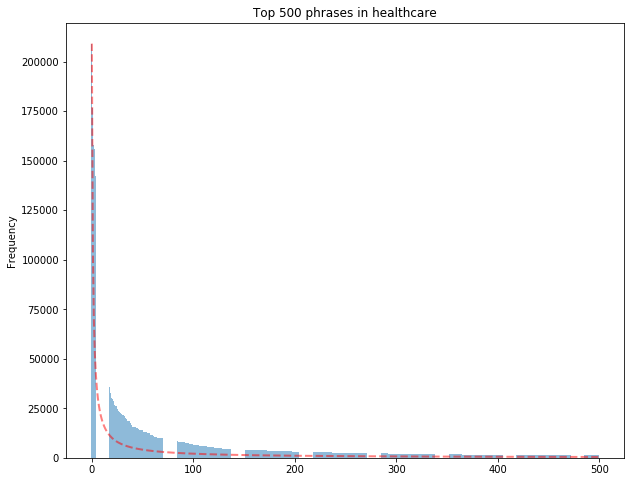

In [42]:
#2.7 Frequency plot of top frequent 500 phrases in healthcare tweets
y_pos = np.arange(500)
plt.figure(figsize=(10,8))
s = 1
expected_zipf = [term_freq_df.sort_values(by='total', ascending=False)['total'][0]/(i+1)**s for i in y_pos]
plt.bar(y_pos, term_freq_df.sort_values(by='total', ascending=False)['total'][:500], align='center', alpha=0.5)
plt.plot(y_pos, expected_zipf, color='r', linestyle='--',linewidth=2,alpha=0.5)
plt.ylabel('Frequency')
plt.title('Top 500 phrases in healthcare')


In [43]:
#2.8 Plot of Absolute frequency of phrases against their rank

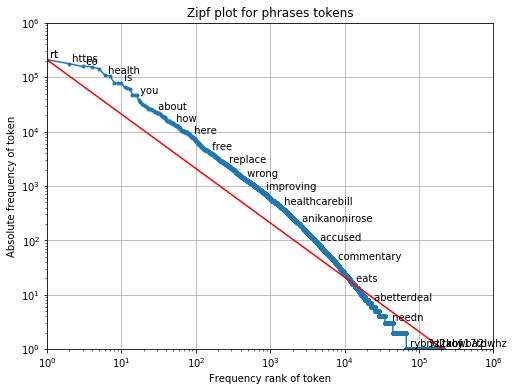

In [44]:
from pylab import *
counts = term_freq_df.total
tokens = term_freq_df.index
ranks = arange(1, len(counts)+1)
indices = argsort(-counts)
frequencies = counts[indices]
plt.figure(figsize=(8,6))
plt.ylim(1,10**6)
plt.xlim(1,10**6)
loglog(ranks, frequencies, marker=".")
plt.plot([1,frequencies[0]],[frequencies[0],1],color='r')
title("Zipf plot for phrases tokens")
xlabel("Frequency rank of token")
ylabel("Absolute frequency of token")
grid(True)
for n in list(logspace(-0.5, log10(len(counts)-2), 25).astype(int)):
    dummy = text(ranks[n], frequencies[n], " " + tokens[indices[n]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [45]:
#2.9 Tokens Visualisation

In [46]:

from sklearn.feature_extraction.text import CountVectorizer
cvec = CountVectorizer(stop_words='english',max_features=10000)
cvec.fit(df2.text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=10000, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words='english',
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [47]:
neg_matrix = cvec.transform(df2[df2.sentiment == 0].text)
sli_neg_matrix = cvec.transform(df2[df2.sentiment == 1].text)
neu_matrix = cvec.transform(df2[df2.sentiment == 2].text)
sli_pos_matrix = cvec.transform(df2[df2.sentiment == 3].text)
pos_matrix = cvec.transform(df2[df2.sentiment == 4].text)

neg_words = neg_matrix.sum(axis=0)
neg_words_freq = [(word, neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neg_tf = pd.DataFrame(list(sorted(neg_words_freq, key = lambda x:x[1], reverse = True)),columns = ['Terms','negative'])

neg_tf_df = neg_tf.set_index('Terms')

sli_neg_words = sli_neg_matrix.sum(axis=0)
sli_neg_words_freq = [(word, sli_neg_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_neg_tf = pd.DataFrame(list(sorted(sli_neg_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-negative'])
sli_neg_tf_df = sli_neg_tf.set_index('Terms')

neu_words = neu_matrix.sum(axis=0)
neu_words_freq = [(word, neu_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
neu_words_tf = pd.DataFrame(list(sorted(neu_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','neutral'])
neu_words_tf_df = neu_words_tf.set_index('Terms')

sli_pos_words = sli_pos_matrix.sum(axis=0)
sli_pos_words_freq = [(word, sli_pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
sli_pos_words_tf = pd.DataFrame(list(sorted(sli_pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','slight-positive'])
sli_pos_words_tf_df = sli_pos_words_tf.set_index('Terms')

pos_words = pos_matrix.sum(axis=0)
pos_words_freq = [(word, pos_words[0, idx]) for word, idx in cvec.vocabulary_.items()]
pos_words_tf = pd.DataFrame(list(sorted(pos_words_freq, key = lambda x: x[1], reverse=True)),columns=['Terms','positive'])
pos_words_tf_df = pos_words_tf.set_index('Terms')

term_freq_df = pd.concat([neg_tf_df,sli_neg_tf_df,neu_words_tf_df,sli_pos_words_tf_df,pos_words_tf_df],axis=1)

term_freq_df['total'] = term_freq_df['negative'] + term_freq_df['slight-negative'] \
                                 + term_freq_df['neutral'] + term_freq_df['slight-positive'] \
                                 +  term_freq_df['positive'] 
term_freq_df.sort_values(by='total', ascending=False).head(20)

/home/joe/.local/lib/python3.6/site-packages/ipykernel_launcher.py:33: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.



,negative,slight-negative,neutral,slight-positive,positive,total
https,4636,12241,66569,29572,6476,119494
rt,3420,9655,42466,20052,3877,79470
health,1898,6968,29449,16673,2935,57923
care,1808,6620,28178,16325,3022,55953
healthcare,1625,5384,26526,15267,3148,51950
obamacare,1075,2471,10467,3692,668,18373
amp,495,1837,7283,4325,885,14825
trump,849,1999,7288,2818,538,13492
gop,656,1736,6058,2638,412,11500
people,441,1486,4072,2760,451,9210


Text(0.5, 1.0, 'Top 50 tokens in negative healthcare')

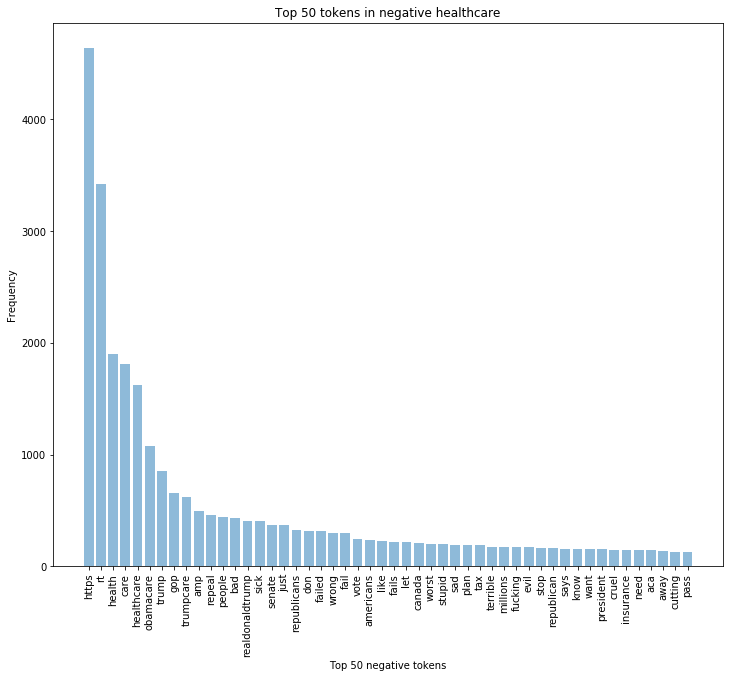

In [48]:

y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='negative', ascending=False)['negative'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 negative tokens')
plt.title('Top 50 tokens in negative healthcare')


Text(0.5, 1.0, 'Top 50 tokens in positive healthcare')

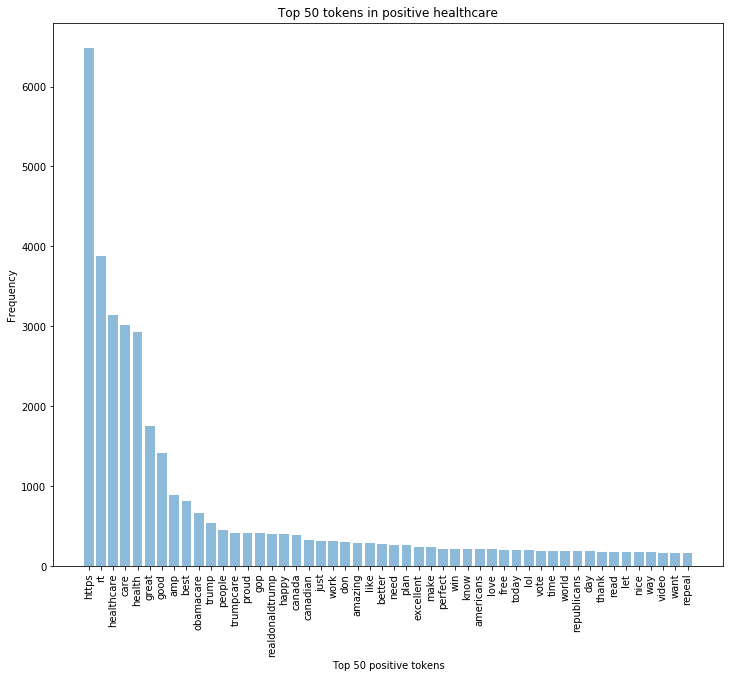

In [49]:
y_pos = np.arange(50)
plt.figure(figsize=(12,10))
plt.bar(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50], align='center', alpha=0.5)
plt.xticks(y_pos, term_freq_df.sort_values(by='positive', ascending=False)['positive'][:50].index,rotation='vertical')
plt.ylabel('Frequency')
plt.xlabel('Top 50 positive tokens')
plt.title('Top 50 tokens in positive healthcare')


In [50]:
#3 Supervised Machine Learning Models

In [51]:
#3.1 Split whole data to train and test datasets, 80% for trainning, 20% for testing

In [52]:
phrase = np.array(df2['text'])
sentiments = np.array(df2['sentiment'])

from sklearn.model_selection import train_test_split    
phrase_train, phrase_test, sentiments_train, sentiments_test = train_test_split(phrase, sentiments, test_size=0.2, random_state=4)

In [53]:
performace_metrics = pd.DataFrame(columns=['accuracy','precision','recall','F1_score'], 
                                  index=['logisticRegression_Unigram','logisticRegression_Bigram','logisticRegression_Trigram',
                                         'RandomForest_Unigram','RandomForest_Bigram','RandomForest_Trigram',
                                         'LinearSVC_Unigram','LinearSVC_Bigram','LinearSVC_Trigram'])

In [54]:
#3.2 Implementation of TF-IDF on N-grams

In [55]:
from sklearn.feature_extraction.text import TfidfVectorizer

#<1> build TF-IDF features on unigram
tv1 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(1,1),
                     sublinear_tf=True)
tv1_train_features = tv1.fit_transform(phrase_train)

#<2> build TF-IDF features on bigram
tv2 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(2,2),
                     sublinear_tf=True)
tv2_train_features = tv2.fit_transform(phrase_train)

#<3> build TF-IDF features on trigram
tv3 = TfidfVectorizer(min_df=0.0, max_df=1.0, ngram_range=(3,3),
                     sublinear_tf=True)
tv3_train_features = tv3.fit_transform(phrase_train)


In [56]:
# transform test reviews into features

tv1_test_features = tv1.transform(phrase_test)
tv2_test_features = tv2.transform(phrase_test)
tv3_test_features = tv3.transform(phrase_test)

In [57]:

print('TFIDF Unigram model:> Train features shape:', tv1_train_features.shape, ' Test features shape:', tv1_test_features.shape)
print('TFIDF Bigram model:> Train features shape:', tv2_train_features.shape, ' Test features shape:', tv2_test_features.shape)
print('TFIDF Trigram model:> Train features shape:', tv3_train_features.shape, ' Test features shape:', tv3_test_features.shape)

TFIDF Unigram model:> Train features shape: (132689, 177139)  Test features shape: (33173, 177139)
TFIDF Bigram model:> Train features shape: (132689, 786601)  Test features shape: (33173, 786601)
TFIDF Trigram model:> Train features shape: (132689, 1416285)  Test features shape: (33173, 1416285)


In [58]:
#3.3 Logistic Regression model 

              precision    recall  f1-score   support

           0       0.75      0.38      0.51      1360
           1       0.68      0.44      0.54      3823
           2       0.79      0.90      0.84     17275
           3       0.78      0.77      0.78      8863
           4       0.71      0.58      0.64      1852

    accuracy                           0.78     33173
   macro avg       0.74      0.62      0.66     33173
weighted avg       0.77      0.78      0.77     33173


Accuracy: 0.7763

Weighted Averaged Validation Metrics
Precision Score: 0.77
Recall Score: 0.7763
F1 Score: 0.7655



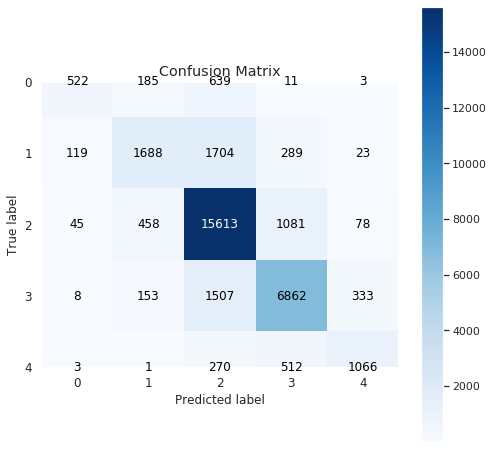

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

# <1> Unigram LogisticRegression

lr = LogisticRegression(multi_class = 'ovr', solver = 'sag', random_state=1)
lr.fit(tv1_train_features,sentiments_train)
predictions = lr.predict(tv1_test_features)

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['logisticRegression_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['logisticRegression_Unigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                                   average='micro')
performace_metrics.loc['logisticRegression_Unigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                             average='micro')
performace_metrics.loc['logisticRegression_Unigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')


              precision    recall  f1-score   support

           0       0.84      0.12      0.21      1360
           1       0.70      0.23      0.34      3823
           2       0.64      0.94      0.76     17275
           3       0.74      0.50      0.60      8863
           4       0.74      0.21      0.32      1852

    accuracy                           0.67     33173
   macro avg       0.73      0.40      0.45     33173
weighted avg       0.69      0.67      0.62     33173


Accuracy: 0.6656

Weighted Averaged Validation Metrics
Precision Score: 0.6895
Recall Score: 0.6656
F1 Score: 0.623



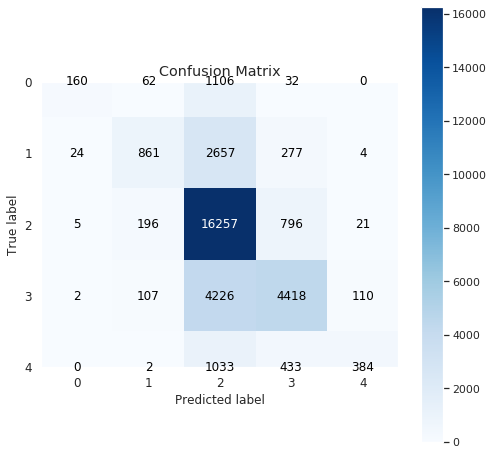

In [60]:
# <2> Bigram LogisticRegression

lr = LogisticRegression(multi_class = 'ovr', solver = 'sag', random_state=1)
lr.fit(tv2_train_features,sentiments_train) # Bigram
predictions = lr.predict(tv2_test_features) # Bigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['logisticRegression_Bigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['logisticRegression_Bigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                                  average='micro')
performace_metrics.loc['logisticRegression_Bigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                            average='micro')
performace_metrics.loc['logisticRegression_Bigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')


              precision    recall  f1-score   support

           0       0.87      0.10      0.17      1360
           1       0.77      0.14      0.23      3823
           2       0.59      0.96      0.73     17275
           3       0.75      0.32      0.45      8863
           4       0.76      0.11      0.19      1852

    accuracy                           0.61     33173
   macro avg       0.75      0.32      0.35     33173
weighted avg       0.68      0.61      0.55     33173


Accuracy: 0.6138

Weighted Averaged Validation Metrics
Precision Score: 0.675
Recall Score: 0.6138
F1 Score: 0.5453



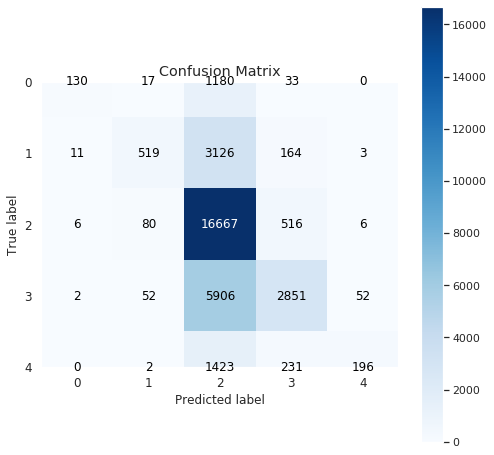

In [61]:
# <3> Trigram LogisticRegression

lr = LogisticRegression(multi_class = 'ovr', solver = 'sag', random_state=1)
lr.fit(tv3_train_features,sentiments_train) # Trigram
predictions = lr.predict(tv3_test_features) # Trigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['logisticRegression_Trigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['logisticRegression_Trigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                                   average='micro')
performace_metrics.loc['logisticRegression_Trigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                             average='micro')
performace_metrics.loc['logisticRegression_Trigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

In [62]:
#3.4 Support Vector Machine(SVM) 
# LinearSVC

from sklearn.svm import LinearSVC

              precision    recall  f1-score   support

           0       0.76      0.63      0.69      1360
           1       0.69      0.60      0.64      3823
           2       0.86      0.89      0.88     17275
           3       0.81      0.83      0.82      8863
           4       0.77      0.69      0.73      1852

    accuracy                           0.82     33173
   macro avg       0.78      0.73      0.75     33173
weighted avg       0.82      0.82      0.82     33173


Accuracy: 0.8207

Weighted Averaged Validation Metrics
Precision Score: 0.8172
Recall Score: 0.8207
F1 Score: 0.8179



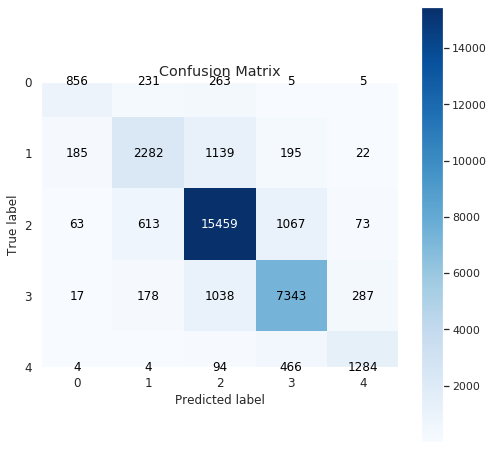

In [64]:
# <1> Unigram LinearSVC

clf = LinearSVC(multi_class='ovr', random_state=1)
clf.fit(tv1_train_features,sentiments_train)
predictions = clf.predict(tv1_test_features)

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['LinearSVC_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['LinearSVC_Unigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                         average='micro')
performace_metrics.loc['LinearSVC_Unigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                   average='micro')
performace_metrics.loc['LinearSVC_Unigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

              precision    recall  f1-score   support

           0       0.75      0.36      0.49      1360
           1       0.69      0.46      0.55      3823
           2       0.74      0.90      0.81     17275
           3       0.75      0.66      0.70      8863
           4       0.72      0.48      0.57      1852

    accuracy                           0.74     33173
   macro avg       0.73      0.57      0.63     33173
weighted avg       0.74      0.74      0.73     33173


Accuracy: 0.7392

Weighted Averaged Validation Metrics
Precision Score: 0.7372
Recall Score: 0.7392
F1 Score: 0.7267



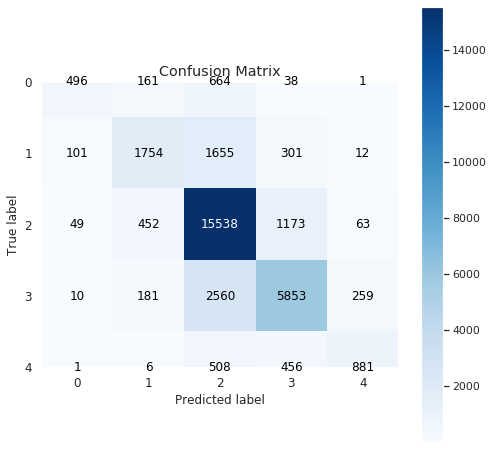

In [65]:
# <2> Bigram LinearSVC

clf = LinearSVC(multi_class='ovr', random_state=1)
clf.fit(tv2_train_features,sentiments_train) # Bigram
predictions = clf.predict(tv2_test_features) # Bigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['LinearSVC_Bigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['LinearSVC_Bigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                         average='micro')
performace_metrics.loc['LinearSVC_Bigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                   average='micro')
performace_metrics.loc['LinearSVC_Bigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

              precision    recall  f1-score   support

           0       0.74      0.29      0.42      1360
           1       0.69      0.35      0.46      3823
           2       0.67      0.89      0.77     17275
           3       0.68      0.52      0.59      8863
           4       0.71      0.34      0.46      1852

    accuracy                           0.68     33173
   macro avg       0.70      0.48      0.54     33173
weighted avg       0.68      0.68      0.65     33173


Accuracy: 0.6759

Weighted Averaged Validation Metrics
Precision Score: 0.6805
Recall Score: 0.6759
F1 Score: 0.6532



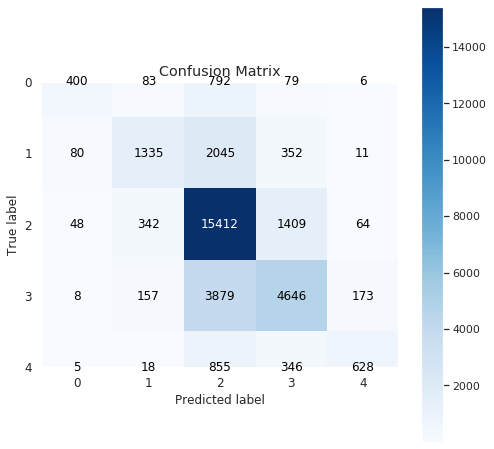

In [66]:
# <3> Trigram LinearSVC

clf = LinearSVC(multi_class='ovr', random_state=1)
clf.fit(tv3_train_features,sentiments_train) # Trigram
predictions = clf.predict(tv3_test_features) # Trigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['LinearSVC_Trigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['LinearSVC_Trigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                          average='micro')
performace_metrics.loc['LinearSVC_Trigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                    average='micro')
performace_metrics.loc['LinearSVC_Trigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

In [67]:
#3.5 RandomForest  

from sklearn.ensemble import RandomForestClassifier

/home/joe/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.67      0.32      0.43      1360
           1       0.66      0.37      0.48      3823
           2       0.70      0.92      0.80     17275
           3       0.74      0.59      0.66      8863
           4       0.73      0.33      0.46      1852

    accuracy                           0.71     33173
   macro avg       0.70      0.51      0.56     33173
weighted avg       0.71      0.71      0.69     33173


Accuracy: 0.7094

Weighted Averaged Validation Metrics
Precision Score: 0.7095
Recall Score: 0.7094
F1 Score: 0.6884



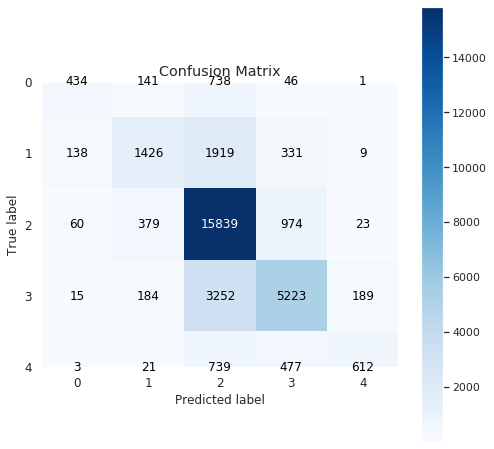

In [68]:
# <1> Unigram RandomForest

rfc = RandomForestClassifier(random_state=1)
rfc.fit(tv1_train_features,sentiments_train) # Unigram
predictions = rfc.predict(tv1_test_features) # Unigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['RandomForest_Unigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['RandomForest_Unigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                            average='micro')
performace_metrics.loc['RandomForest_Unigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                      average='micro')
performace_metrics.loc['RandomForest_Unigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

/home/joe/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.65      0.28      0.39      1360
           1       0.67      0.34      0.45      3823
           2       0.67      0.93      0.78     17275
           3       0.76      0.49      0.59      8863
           4       0.67      0.33      0.44      1852

    accuracy                           0.68     33173
   macro avg       0.68      0.47      0.53     33173
weighted avg       0.69      0.68      0.65     33173


Accuracy: 0.6818

Weighted Averaged Validation Metrics
Precision Score: 0.6903
Recall Score: 0.6818
F1 Score: 0.6548



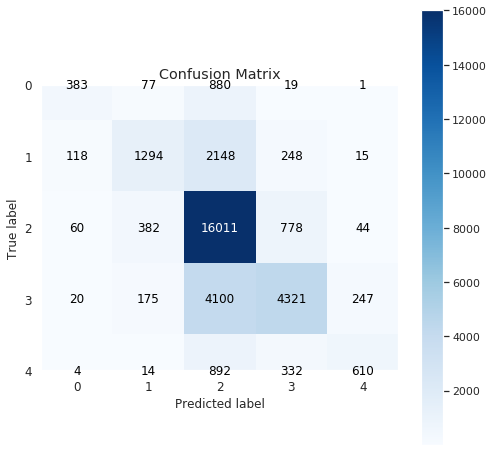

In [69]:
# <2> Bigram RandomForest

rfc = RandomForestClassifier(random_state=1)
rfc.fit(tv2_train_features,sentiments_train) # Bigram
predictions = rfc.predict(tv2_test_features) # Bigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['RandomForest_Bigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['RandomForest_Bigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                            average='micro')
performace_metrics.loc['RandomForest_Bigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                      average='micro')
performace_metrics.loc['RandomForest_Bigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

/home/joe/.local/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


              precision    recall  f1-score   support

           0       0.61      0.27      0.37      1360
           1       0.64      0.30      0.40      3823
           2       0.63      0.92      0.75     17275
           3       0.73      0.39      0.51      8863
           4       0.61      0.28      0.39      1852

    accuracy                           0.65     33173
   macro avg       0.65      0.43      0.48     33173
weighted avg       0.66      0.65      0.61     33173


Accuracy: 0.6462

Weighted Averaged Validation Metrics
Precision Score: 0.6574
Recall Score: 0.6462
F1 Score: 0.6105



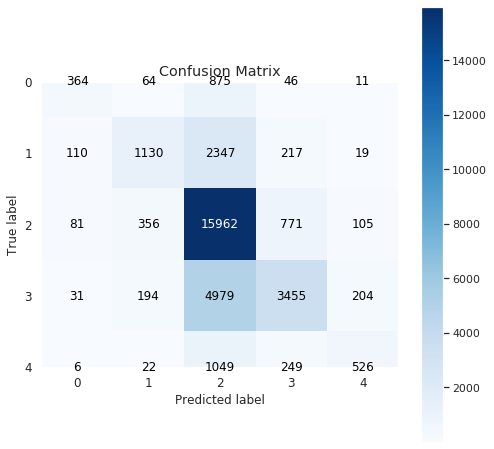

In [70]:
# <3> Trigram RandomForest

rfc = RandomForestClassifier(random_state=1)
rfc.fit(tv3_train_features,sentiments_train) # Trigram
predictions = rfc.predict(tv3_test_features) # Trigram

print(classification_report(sentiments_test, predictions))

print()
print('Accuracy:', np.round(accuracy_score(sentiments_test, predictions),4))

print()
print("Weighted Averaged Validation Metrics")
print('Precision Score:', np.round(precision_score(sentiments_test, predictions,average='weighted'),4))
print('Recall Score:', np.round(recall_score(sentiments_test, predictions,average='weighted'),4))
print('F1 Score:', np.round(f1_score(sentiments_test, predictions,average='weighted'),4))

print()
from sklearn.metrics import confusion_matrix
import scikitplot as skplt
sns.set(rc={'figure.figsize':(8,8)})
skplt.metrics.plot_confusion_matrix(sentiments_test, predictions)

performace_metrics.loc['RandomForest_Trigram']['accuracy'] = accuracy_score(sentiments_test, predictions)
performace_metrics.loc['RandomForest_Trigram']['precision'] = precision_score(sentiments_test, predictions,
                                                                             average='micro')
performace_metrics.loc['RandomForest_Trigram']['recall'] = recall_score(sentiments_test, predictions,
                                                                       average='micro')
performace_metrics.loc['RandomForest_Trigram']['F1_score'] = f1_score(sentiments_test, predictions, 
                                                                            average='micro')

In [71]:
performace_metrics.sort_values(by='accuracy', ascending=False)

,accuracy,precision,recall,F1_score
LinearSVC_Unigram,0.820667,0.820667,0.820667,0.820667
logisticRegression_Unigram,0.776264,0.776264,0.776264,0.776264
LinearSVC_Bigram,0.739216,0.739216,0.739216,0.739216
RandomForest_Unigram,0.709432,0.709432,0.709432,0.709432
RandomForest_Bigram,0.68185,0.68185,0.68185,0.68185
LinearSVC_Trigram,0.675881,0.675881,0.675881,0.675881
logisticRegression_Bigram,0.665602,0.665602,0.665602,0.665602
RandomForest_Trigram,0.646218,0.646218,0.646218,0.646218
logisticRegression_Trigram,0.613843,0.613843,0.613843,0.613843


(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

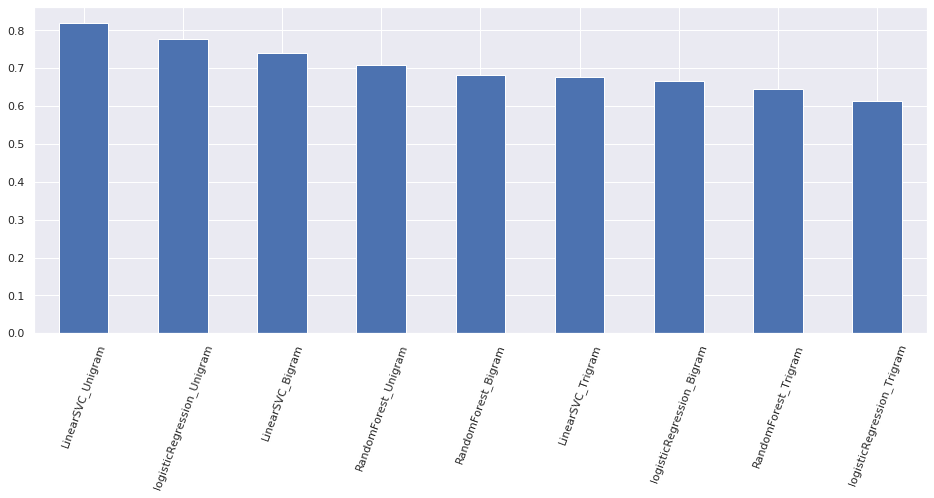

In [97]:
sns.set(rc={'figure.figsize':(16,6)})


performace_metrics.sort_values(by="accuracy", ascending=False).accuracy.plot(kind="bar")

plt.xticks(rotation=70)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

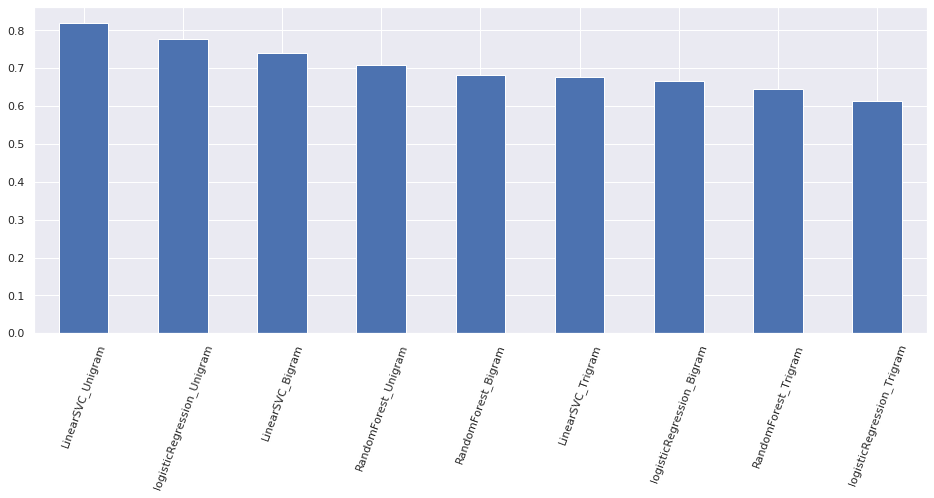

In [98]:
sns.set(rc={'figure.figsize':(16,6)})


performace_metrics.sort_values(by="F1_score", ascending=False).accuracy.plot(kind="bar")

plt.xticks(rotation=70)

In [ ]:
#Summary: In general, LinearSVC and logisticRegression on Unigram stay on the top of the models